### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Synthetic Data Generation

- **`0.5 * time`**: Represents the trend (linear growth).
- **`10 * np.sin(0.2 * time)`**: Adds seasonality (cyclical pattern).
- **`np.random.normal(scale=5, size=len(time))`**: Adds noise (random fluctuations) using Normal Distribution

In [8]:
# Create synthetic time series
np.random.seed(101)
time = np.arange(100)
data = 0.5 * time + 10 * np.sin(0.2 * time) + np.random.normal(scale=5, size=len(time))
df = pd.DataFrame({"Time":time, "Value":data})

df.head(5)

,Time,Value
0,0,13.534249
1,1,5.627357
2,2,9.434031
3,3,9.665554
4,4,12.429151


### Local Trend

In [9]:
# Local Trend: Moving Avg.
df["Local_Trend"] = df["Value"].rolling(window=10).mean()
df.head(5)

,Time,Value,Local_Trend
0,0,13.534249,NaN
1,1,5.627357,NaN
2,2,9.434031,NaN
3,3,9.665554,NaN
4,4,12.429151,NaN


### Global Trend

In [21]:
# Global Trend: Linear Regression (because degree 1), if degree > 1 then polynomial regression
global_trend = np.polyfit(time, data, deg=1)
df["Global_Trend"] = global_trend[0] * df["Time"] + global_trend[1] # Linear Regression (input1 * coefficient1/slope1 + constant)
# df["Global_Trend"] = global_trend[0] * df["Time"]**2 + global_trend[1] * df["Time"] + global_trend[2] # Polynomial Regression (input1 * coefficient1/slope1**2 + input1 * coefficient2/slope2 + constant)
df.head(5)

,Time,Value,Local_Trend,Global_Trend
0,0,13.534249,NaN,4.303543
1,1,5.627357,NaN,4.738445
2,2,9.434031,NaN,5.173346
3,3,9.665554,NaN,5.608248
4,4,12.429151,NaN,6.043149


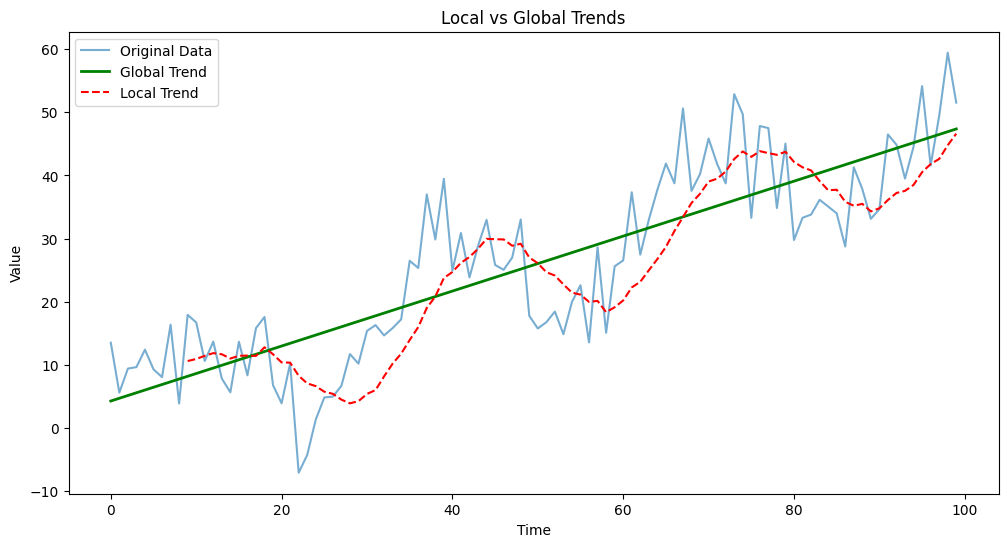

In [22]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Time"], df["Value"], label="Original Data", alpha=0.6)
plt.plot(df["Time"], df["Global_Trend"], label="Global Trend", color="green", linewidth=2)
plt.plot(df["Time"], df["Local_Trend"], label="Local Trend", color="red", linestyle="--")
plt.legend()
plt.title("Local vs Global Trends")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
